In [1]:
import pandas as pd
df=pd.read_csv('d:/data/ozone/ozone4.csv')
df.head()

,Ozone,Solar.R,Solar.R2,Wind,Temp,Month,Day,Ozone2,Result
0,41.0,190.0,190.000000,7.4,67,5,1,41.00000,0
1,36.0,118.0,118.000000,8.0,72,5,2,36.00000,0
2,12.0,149.0,149.000000,12.6,74,5,3,12.00000,0
3,18.0,313.0,313.000000,11.5,62,5,4,18.00000,0
4,NaN,NaN,185.931507,14.3,56,5,5,42.12931,0


In [2]:
df['Result'].value_counts()

0    109
1     44
Name: Result, dtype: int64

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
cols=['Solar.R2','Wind','Temp']
X=df[cols]
y=df['Result']
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [4]:
df_samp['Result'].value_counts() #샘플링 후의 0,1 분포

1    44
0    44
Name: Result, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [6]:
from sklearn.tree import DecisionTreeClassifier
#의사결정나무 모형을 만들고 학습용 데이터셋으로 기계학습
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [7]:
#예측정확도 확인
print(model.score(X_train,y_train)) #학습용 100%
print(model.score(X_test,y_test)) #검증용 77.4% 과적합화

1.0
0.7741935483870968


In [8]:
#가지치기 옵션을 3으로 설정
model=DecisionTreeClassifier(random_state=0,max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [9]:
print(model.score(X_train,y_train)) #학습용
print(model.score(X_test,y_test)) #검증용

0.9262295081967213
0.7741935483870968


In [10]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test) #예측한 값
cm=confusion_matrix(y_test,pred) #실제값과 예측값 비교
cm

array([[18,  4],
       [ 3,  6]], dtype=int64)

In [11]:
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
df_cm

,0,1
0,18,4
1,3,6


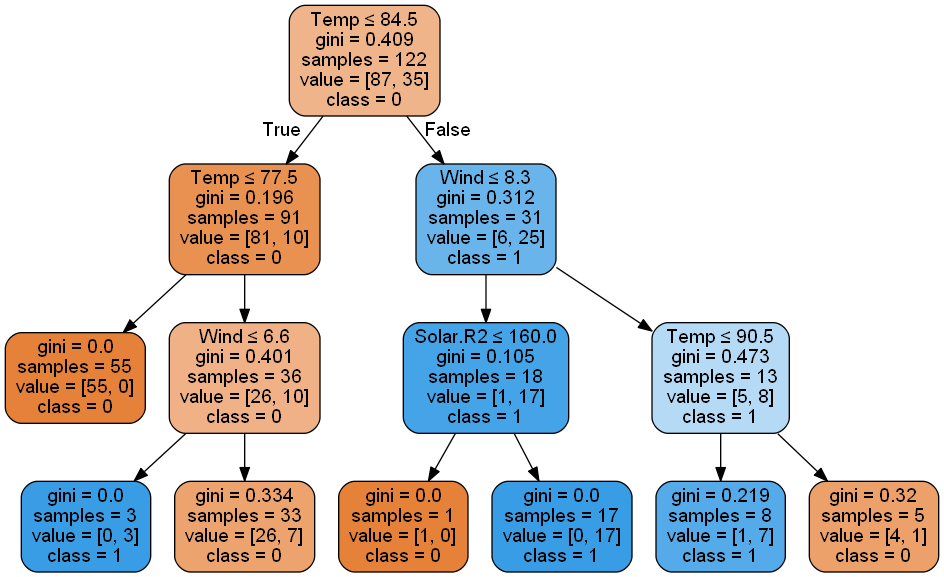

In [12]:
#pip install pydotplus
#pip install graphviz
#Graphviz's executables not found => graphviz 프로그램 설이 경로
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

#graphviz 실행파일의 경로 지정
import os
#운영체제의 환경변수에 graphiz 실행파일의 경로 추가
os.environ['PATH'] +=\
os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'


# feature_name 필드명, class_name 종속변수의 라벨
dot_data=export_graphviz(model,out_file=None,feature_names=cols,
                         class_names=['0','1'],filled=True,rounded=True,
                         special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) #트리 그래프 출력
# 온도 77.5 ~ 84.5 , 풍량 <=6.6=> 오존량 충분
# 온도 >= 84.5 ,  풍량 <-8.3, 일조량 <= 160 => 오존량 충분                         

(153, 3)
3
[0.05315165 0.14206945 0.8047789 ]


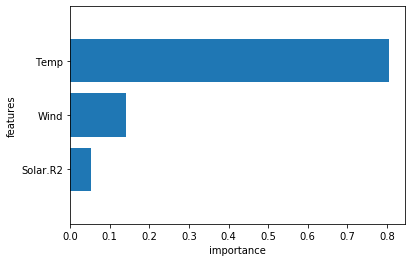

In [16]:
#특성의 중요도 그래프
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#feature_importances_ 변수의 중요도
def plot_tree(model):
    n_features=X.shape[1] #변수의 갯수
    plt.barh(range(n_features),model.feature_importances_,
    align='center')
    plt.yticks(np.arange(n_features),cols) #y축 눈금
    plt.xlabel('importance') #x축 제목
    plt.ylabel('features') #y축 제목
    plt.ylim(-1,n_features) #y축의 값의 범위
    
plot_tree(model)
#의사결정나무 모형을 만들기 위한 변수의 중요도
# Temp > Wind > Solar.R2
print(X.shape)
print(X.shape[1])
print(model.feature_importances_)

In [31]:
from sklearn.ensemble import RandomForestClassifier
#랜덤포레스트 모형, n_estimators 트리갯수
forest=RandomForestClassifier(n_estimators=10, random_state=10,
                             max_depth=3)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [32]:
print(forest.score(X_train,y_train)) #학습용
print(forest.score(X_test,y_test)) #검증용

0.9098360655737705
0.8387096774193549


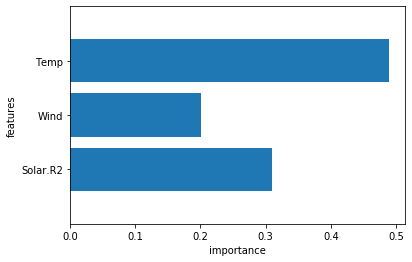

In [33]:
#랜덤포레스트 모형의 특성 중요도 그래프
plot_tree(forest)
#랜덤포레스트 모형을 만들기 위한 변수의 중요도
#temp>solar.r2>wind